## KDE 그래프를 그리고 저장하는 코드.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import product

In [3]:
# csv 파일 경로 지정 및 kde 그래프 저장할 경로 지정.
csv_path = "/home/work/AGE/new_train.csv"
save_path = "/home/work/AGE/kde"
df = pd.read_csv(csv_path)

In [4]:

criterion_column = ['gender'] # 세부 분류 기준 column. 
target_columns = ['age'] # 주요 분류 기준 column.

# ex 등급 별 마블링 kde 그래프
# criterion_column = ['grade']
# target_columns = ['Marbling']

In [5]:
def _no_criterion(df, target_columns):
    for t in target_columns:
        fig = plt.figure(figsize=(10,10))
        sns.kdeplot(df[t], bw='1', shade=True)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {t}')
        fig.savefig(os.path.join(save_path,f'kde_{t}.png'))
        plt.show()
        plt.clf()

def _criterion(df, criterion_column, target_columns):
    unique_values = [df[col].unique() for col in criterion_column]
    unique_values = [arr[~np.isnan(arr)] for arr in unique_values]
    all_combinations = list(product(*unique_values))
    
    target = target_columns

    for value in all_combinations:
        for t in target:
            c_df = df
            for idx, c in enumerate(value):
                c_df = c_df[c_df[criterion_column[idx]] == c]
            
            fig = plt.figure(figsize=(10,10))
            sns.kdeplot(c_df[t], bw='1', shade=True)
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.title(f'Density Plot of {value} {t}')
            fig.savefig(os.path.join(save_path,f'kde_{t}_{value}.png'))
            plt.show()
            plt.clf()

def drawKDE(df, criterion_column, target_columns):
    
    if criterion_column is None:
        _no_criterion(df,target_columns)
    else:
        _criterion(df, criterion_column, target_columns)

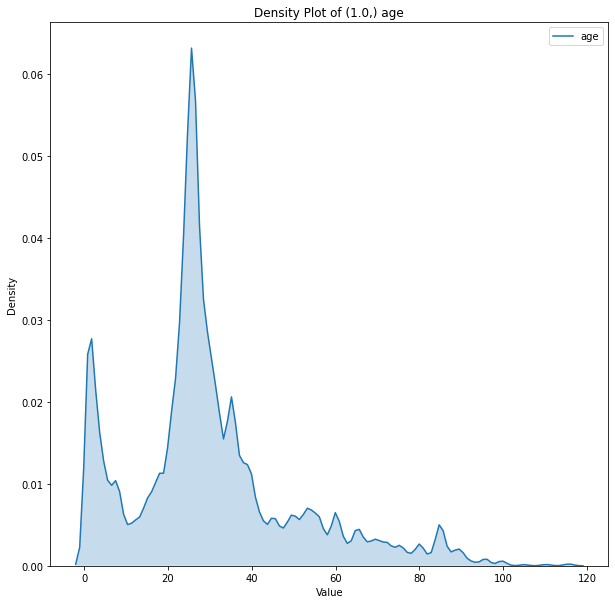

<Figure size 432x288 with 0 Axes>

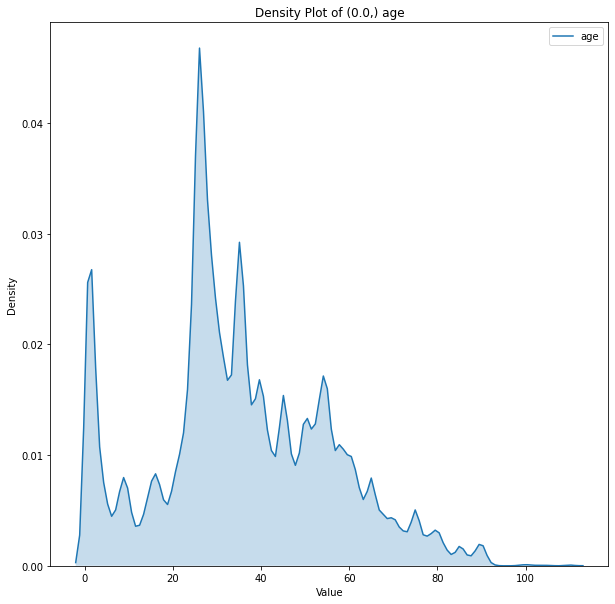

<Figure size 432x288 with 0 Axes>

In [6]:
if not os.path.exists(save_path):
    os.makedirs(save_path)
drawKDE(df, criterion_column, target_columns)